# Machine Learning & Statistics Project 2020


#### Lecturer: Ian McLoughlin

#### Student: Damien Connolly
#### Student number: G00340321
**********************************************************************************
<br/>


### Introduction

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

### Objectives

* Explore the Power production dataset


* Explore models


* Determine model to use


* Develop web service

***************************************************************

### Import libraries to be used in this notebook

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import sklearn.linear_model as lin
from sklearn.linear_model import LinearRegression
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import sklearn.preprocessing as skpp
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
import tensorflow.keras as kr

In [2]:
# Apply setting for plots

# Magic command to ensure that plots render inline
%matplotlib inline

# Apply the default seaborn settings
sns.set()

#Set plot style
plt.style.use("ggplot")

# Set plot size
plt.rcParams['figure.figsize'] = [18, 10]

************************************************************************
### Import Dataset

In [3]:
# Import the power production dataset and view the data
data = pd.read_csv("powerproduction.csv")

# View the whole dataset
pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [31]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
# Summary of dataset
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### About Dataset

The dataset powerproduction will be used to produce a model that accurately predicts wind turbine power output from wind speed values. It contains 500 values for two columns of data, speed and power. Speed refers to wind speed and power represents the power output generated from the wind turbines. Although the measurement units of the variables are not defined wind speed is most commonly measured in metres/second (m/s) and the power output measured in Kilowatts (kW). The wind speed ranges from 0 m/s to 25 m/s and the power output ranges between 0 kW to 113.556 kW.
*************************************************************

#### View Dataset

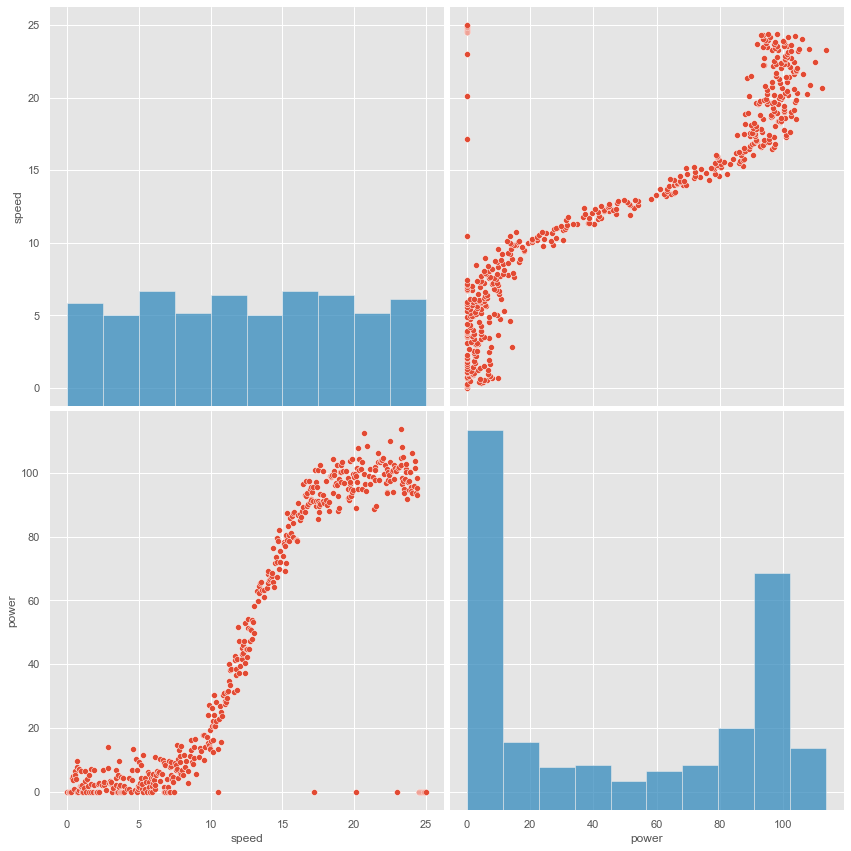

In [5]:
# Create a pairplot to view the dataset
sns.pairplot(data, height=6)

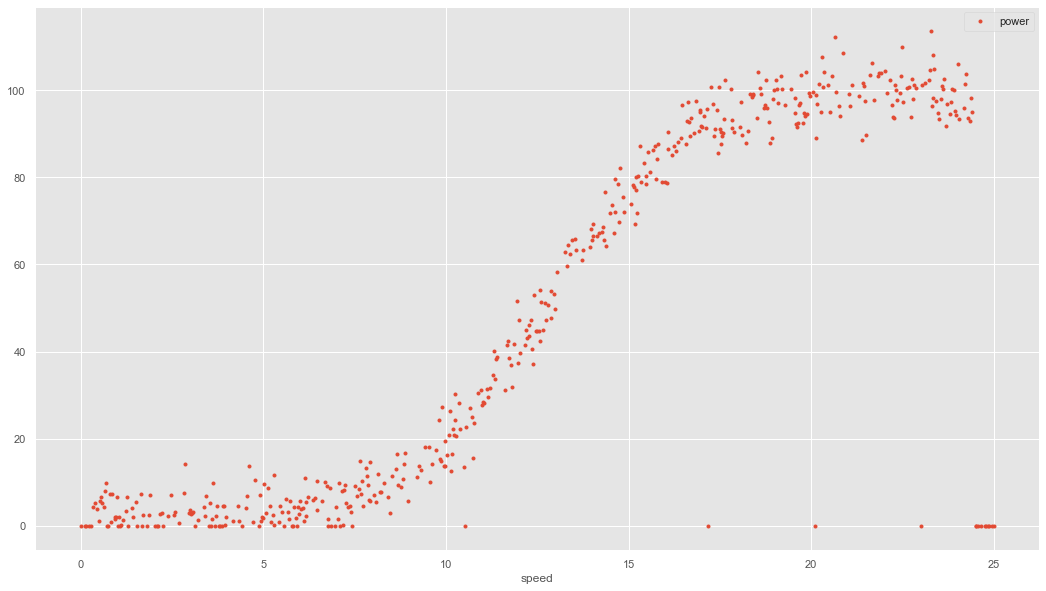

In [6]:
# Plot data
data.plot(x="speed", y="power", style=".")
plt.show()

#### Observations

* It is clear from the datase the higher the wind speed the more power that is generated.

* The wind turbines do not begin to operate until the wind speed reaches over 3 m/s. Wind turbines operate automatically and self-start when the wind speed reaches an average of about three to five m/s[1].

* The power output seems to increase sharply once wind speed of over 10 m/s are reached. 


* The output increases linearly from approxiately 10 to 25 m/s. 25 m/s is the maximum operational limit[1].


* When the wind exceeds the maximum operational limit of 25m/s the wind turbine shuts down.


* The wind speed data value range appears to follow a uniform distribution.


* The power output data has a greater distribution at the low and high power output range.



Due to the operational constraints of the wind turbines there are a number of zero values within the dataset. Most of these are situated at the beginning, where wind speed is under 3 m/s, and at the end when it is near its limit of 25 m/s. There are some other random zero value data points throughout the dataset which could be related to the trubines being shut down for operational and maintenance purposes[1]. 

For modelling purposes these data points will be removed from the dataset as they do not appear to follow the natural relationship between speed and power, and it is best to include only data points relating to the turbines when they were in operation. 
********************************************************************************************************

#### Clean Data

In [7]:
# Remove zero power values https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df = data[(data.power != 0)]

# View data details
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


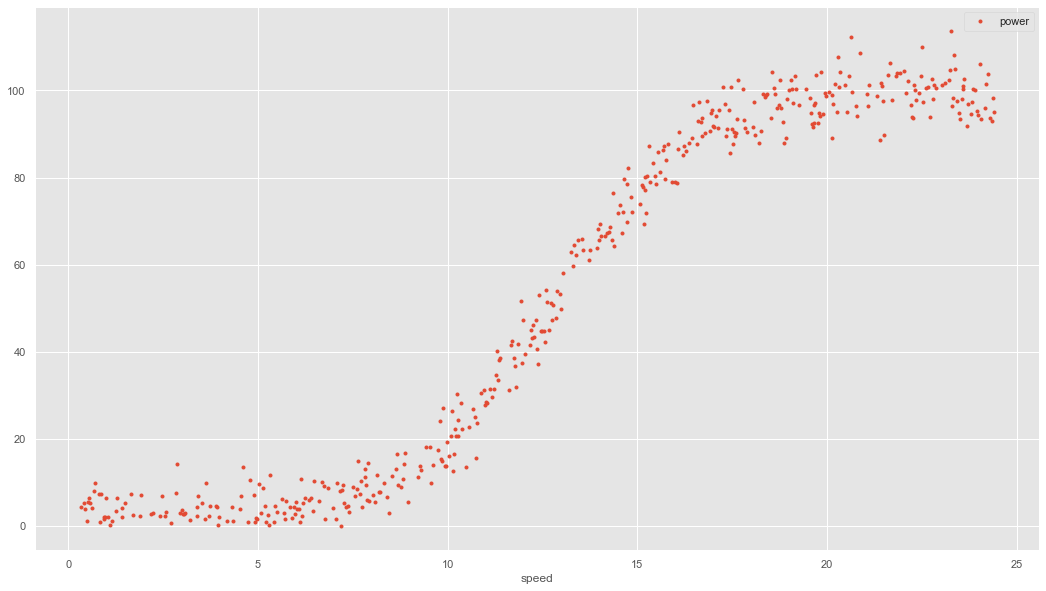

In [8]:
# Plot updated dataset
df.plot(x="speed", y="power", style=".")
plt.show()

After the zero power output data points are removed the dataset contains 451 data points. The wind speed now ranges from 0.325 m/s to 25 m/s and the power output ranges between 0.067 kW to 113.556 kW.

***********************************************************

### Explore Models

Explore different models in order to create a machine learning model based on the speed and power data. The model should be able to take in a new wind speed measurement and accurately predict the power output from a wind turbine. As numpy is one of the essential libraries for machine learning algorithms the data will need to be converted in to a numpy array [https://becominghuman.ai/an-essential-guide-to-numpy-for-machine-learning-in-python-5615e1758301]. The data will then be seperated into training data and test data. The algorithm uses the training data to learn and the test data to evaluate the performance of the model. The test data will contain 30% of the dataset, meaning 315 rows will be used to train the model while 136 rows will be used for testing purposes.  
******************************************************************************************

#### Prepare Dataset for models

In [32]:
# Convert the data from a pandas dataframe to a numpy array for use in the models
# ref - https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead/64042705#64042705

x = df['speed'].values.reshape(-1,1)
y = df['power'].values.reshape(-1,1)

# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

# Print size of each set
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(315, 1) (136, 1) (315, 1) (136, 1)


**********************************************************************
#### View the training and testing data

Text(0.5, 1.0, 'Test set')

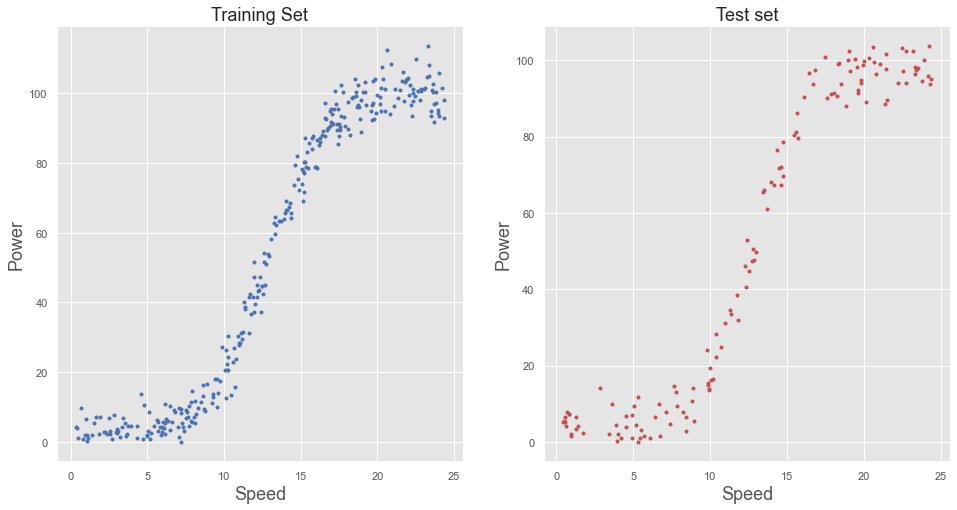

In [10]:
# Plot the training and testing data (https://stackoverflow.com/questions/44633295/multiple-subplots-with-sub-subplots-matlab)

# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(x_train, y_train, 'b.')
axes[1].plot(x_test, y_test, 'r.')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Training Set', fontsize=18)
axes[1].set_title('Test set', fontsize=18)

***************************************************
<br/>

### Linear Regression

Linear regression is one of the fundamental statistical and machine learning techniques. It is a statistical approach for modelling the relationship between a dependent variable with a given set of independent variables based on supervised learning.  It is mostly used for finding out the relationship between variables and forecasting[https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/?ref=rp]. The model will be created using the training data. The accuracy of the model can then be evaluated using different metrics such as: 

* Mean Absolute Error: This measures the average distance between the actual values and the predicted values.


* Mean Squared Error: The measure of the difference between the two continuous variables. The Mean Squared Error is the average vertical distance between each actual value and the line that best matches the data.  


* Root Mean Squared Error: This is defined as the square root of the average squared distance between the actual score and the predicted score 


* R-squared: It is also known as coefficient of determination and it is used to assess how close the data is to the regression line or how well the model has fit the data. R² is always between 0 and 1 or between 0% to 100%.[https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365]
 

#### Build and train the model

In [13]:
# Creating the model 
lin_model = LinearRegression()

# Training the model with training data
lin_model.fit(x_train, y_train)

LinearRegression()

#### Evaluate the model

In [34]:
# Get R-squared value
r2 = lin_model.score(x,y)
r2

0.897753316179645

In [33]:
p = [lin_model.intercept_, lin_model.coef_[0]]
print(p)

[array([-21.74094086]), array([5.77731013])]


In [16]:
# Use predict to test the model
lin_pred = lin_model.predict(x_test)

In [17]:
# Compare predictions against acutal values use flatten() to return a copy of the array collapsed into one dimension
# Code adapted from https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

testdata = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
testdata

,Actual,Predicted
0,9.385,23.657162
1,0.132,1.102543
2,80.418,67.605160
3,93.698,74.838353
4,65.605,55.894553
5,6.656,26.834683
6,7.350,-16.824450
7,94.071,92.765346
8,86.288,68.766400
9,0.929,9.629853


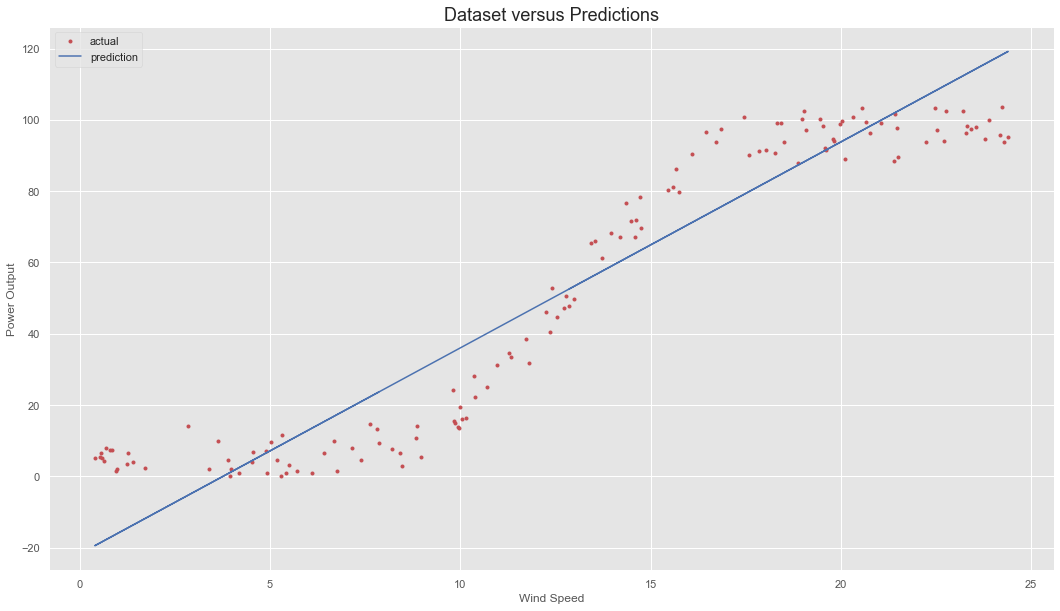

In [18]:
# Plot predictions against the data
plt.plot(x_test, y_test, 'r.', label='actual')
plt.plot(x_test, lin_pred, 'b-', label='prediction')
plt.title("Dataset versus Predictions", fontsize = 18)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

##### Conclusion

Although the coefficient of determination also known as the R-squared value is quite high at 90 it is clear to see from the created dataset that a large number of the predicted values are quite different from the actual values. The graph above also shows a variantion in the values. The model does not seem to replicate the relationship between speed and power.



************************************************************************

### Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.In this regression technique, the best fit line is not a straight line instead it is in the form of a curve. Polynomial regression would seem to fit the data better than linear regression as it follows the flow of the actual data much more closely.

#### Build and train the model

In [19]:
#Fitting the polynomial regression model to the dataset
poly_reg=PolynomialFeatures(degree=4)

x_trainpoly=poly_reg.fit_transform(x_train)
polyreg=LinearRegression()
polyreg.fit(x_trainpoly, y_train)
x_test_poly = poly_reg.fit_transform(x_test)

#### Evaluate the model

In [20]:
# Get R-squared value
p_r2 = polyreg.score(x_test_poly,y_test)
p_r2

0.9731887894212919

In [21]:
polyp =[[polyreg.intercept_, lin_model.coef_[0]]]
polyp

[[array([14.3340745]), array([5.77731013])]]

In [22]:
# Use predict to test the model
poly_pred = polyreg.predict(poly_reg.fit_transform(x_test))

In [35]:
# Compare predictions against acutal values use flatten() to return a copy of the array collapsed into one dimension
# Code adapted from https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

testdata2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': poly_pred.flatten()})
testdata2

,Actual,Predicted
0,9.385,10.896597
1,0.132,-1.023820
2,80.418,75.553388
3,93.698,86.038490
4,65.605,56.822491
5,6.656,14.294587
6,7.350,8.396088
7,94.071,103.871089
8,86.288,77.316149
9,0.929,0.698137


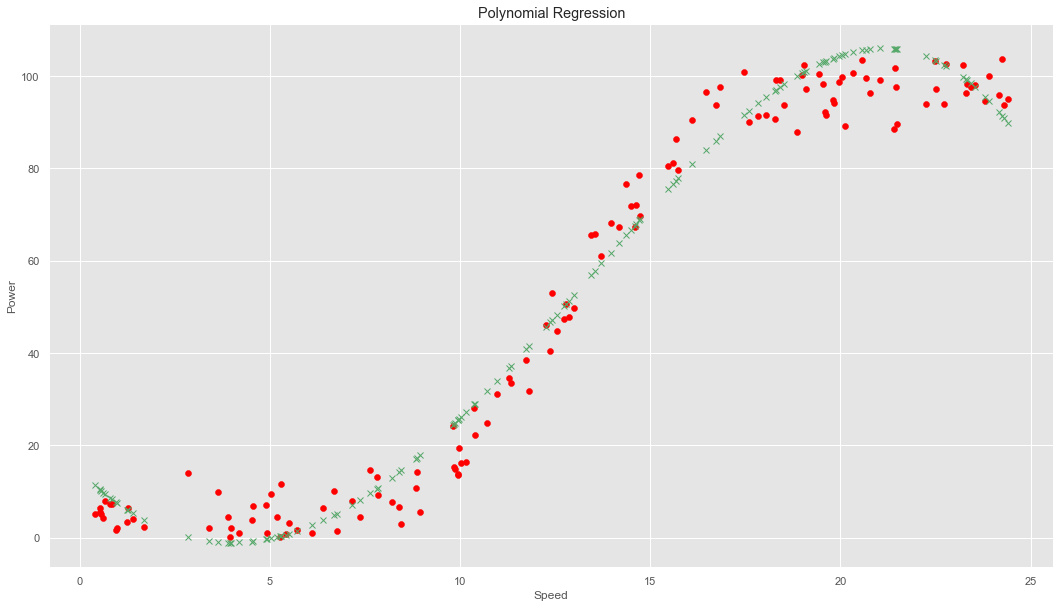

In [36]:
# Visualising the Polynomial Regression results

plt.scatter(x_test, y_test, color = 'red') 
  
plt.plot(x_test, poly_pred, 'gx')
plt.title('Polynomial Regression') 
plt.xlabel('Speed') 
plt.ylabel('Power') 
  
plt.show()

#### Compare the models

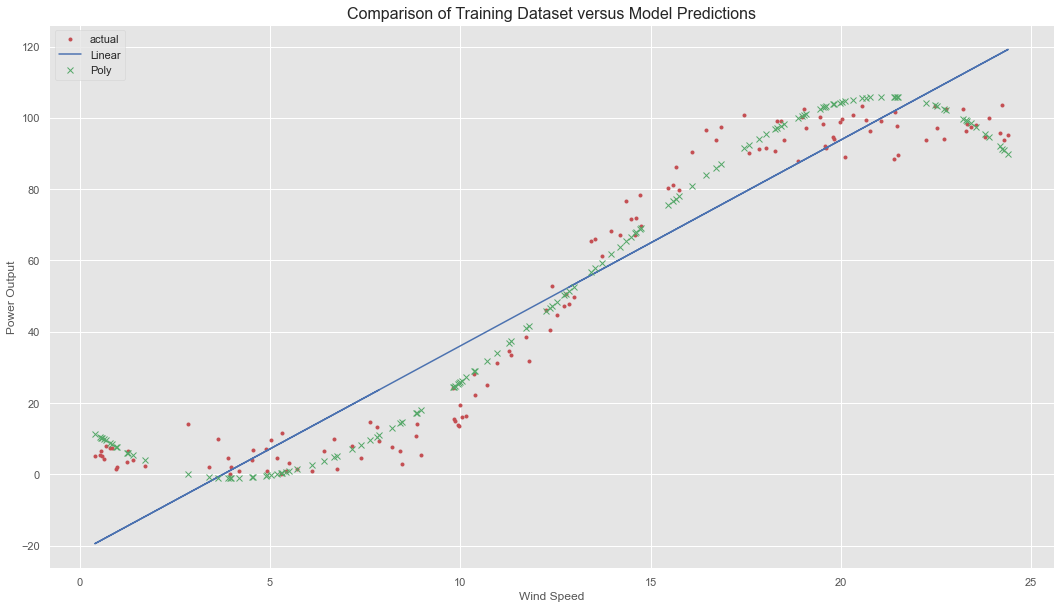

In [25]:
# Plot comparison of dataset and model predictions
plt.plot(x_test, y_test, 'r.', label='actual')
plt.plot(x_test, lin_pred, 'b-', label='Linear')
plt.plot(x_test, poly_pred, 'gx', label='Polynomial')
plt.title("Comparison of Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

In [37]:
# Evaluating the performance of the model
# https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365
print('Linear Model')
print('====================================')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred)) 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, lin_pred))

print('\n\nPolynomial Model')
print('====================================')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred)) 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, poly_pred))

Linear Model
Mean Absolute Error: 11.75568111431187
Mean Squared Error: 190.56823555495086
Root Mean Squared Error: 13.804645433873008
R-squared: 0.8834550362337497


Polynomial Model
Mean Absolute Error: 5.319027207579941
Mean Squared Error: 43.84029071667371
Root Mean Squared Error: 6.62120009640803
R-squared: 0.9731887894212919


##### Results

The results show that the polynomial model is a better fit for the data set. There is a huge improvement in the results between models with the Mean Absolute Error for the polynomial model less than half of the MAE for the linear model. The Root Mean Squared Error is also less than half of the linear model and the R-squared value is much higher on the polynomial model at 0.97 bringing it much closer to 1, 1 being a perfect fit. From the plot above it is clear to see the linear models predictions are in a straight line while the polynomial model follows the actual shape of the data much more accurately.  

********************************************************************
<br/>

### Keras Neural Network

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code. The Keras Neural Network is a way to create models that are more flexible and can handle models with non-linear topology, shared layers, and even multiple inputs or outputs[https://www.tensorflow.org/guide/keras/functional].
*****************************************************************************


#### Create Model

In [27]:
# Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
# Create a new neural network.
model = kr.models.Sequential()

# Add multiple layers, initialised with weight and bias.
model.add(kr.layers.Dense(66, input_dim=1, activation="relu",kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(32, activation='sigmoid'))
model.add(kr.layers.Dense(16, activation='sigmoid'))
model.add(kr.layers.Dense(1, activation=None))


# Compile the model
# The purpose of loss functions is to compute the quantity that a model should seek to minimize during training[https://keras.io/api/losses/]
# The optimizer is used to search through different weights for the network and 
# any optional metrics we would like to collect and report during training[https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/]
model.compile(loss="mean_squared_error", optimizer="adam")

# Model Summary - a summary of how your data gets transformed at each stage of the model[https://keras.io/getting_started/intro_to_keras_for_engineers/]
print ("Model Summary\n")
model.summary()

Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 66)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2144      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________


#### Prepare dataset

In [28]:
# Convert the data to a numpy array for use in the model
# ref - https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead/64042705#64042705
x = df.iloc[:,:-1].to_numpy()
y = df['power'].to_numpy()
x = x.reshape(-1, 1)

#### Train The Model

In [29]:
# Fit the model
# Epochs - The number of times each X value from the training set will be passed through the neural network
# Batch_size - Divides the data into batches equal to batch_size and only this number of samples will be loaded into memory and processed
# [https://www.tensorflow.org/guide/keras/train_and_evaluate]
model.fit(x, y, epochs=500, batch_size=12)
model.summary()

Epoch 1/500
38/38 [==============================] - 0s 2ms/step - loss: 4502.7896
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: 4374.2515
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 4279.7163
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 4221.7925
Epoch 5/500
38/38 [==============================] - 0s 3ms/step - loss: 4174.6792
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 4133.1289
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 4094.0874
Epoch 8/500
38/38 [==============================] - 0s 3ms/step - loss: 4056.9912
Epoch 9/500
38/38 [==============================] - 0s 5ms/step - loss: 4021.3157
Epoch 10/500
38/38 [==============================] - 0s 4ms/step - loss: 3986.7363
Epoch 11/500
38/38 [==============================] - 0s 3ms/step - loss: 3952.9563
Epoch 12/500
38/38 [==============================] - 0s 3ms/step - loss: 3919.6968
E

38/38 [==============================] - 0s 2ms/step - loss: 1712.1755
Epoch 98/500
38/38 [==============================] - 0s 2ms/step - loss: 1693.7004
Epoch 99/500
38/38 [==============================] - 0s 2ms/step - loss: 1675.3060
Epoch 100/500
38/38 [==============================] - 0s 2ms/step - loss: 1657.8844
Epoch 101/500
38/38 [==============================] - 0s 2ms/step - loss: 1639.3995
Epoch 102/500
38/38 [==============================] - 0s 2ms/step - loss: 1621.7030
Epoch 103/500
38/38 [==============================] - 0s 2ms/step - loss: 1604.5529
Epoch 104/500
38/38 [==============================] - 0s 2ms/step - loss: 1585.9302
Epoch 105/500
38/38 [==============================] - 0s 2ms/step - loss: 1568.4504
Epoch 106/500
38/38 [==============================] - 0s 3ms/step - loss: 1551.0068
Epoch 107/500
38/38 [==============================] - 0s 2ms/step - loss: 1534.0192
Epoch 108/500
38/38 [==============================] - 0s 2ms/step - loss: 1517.6

38/38 [==============================] - ETA: 0s - loss: 477.269 - 0s 2ms/step - loss: 480.4597
Epoch 194/500
38/38 [==============================] - 0s 2ms/step - loss: 472.4363
Epoch 195/500
38/38 [==============================] - 0s 2ms/step - loss: 464.1868
Epoch 196/500
38/38 [==============================] - 0s 2ms/step - loss: 457.4075
Epoch 197/500
38/38 [==============================] - 0s 2ms/step - loss: 449.2364
Epoch 198/500
38/38 [==============================] - 0s 2ms/step - loss: 443.1100
Epoch 199/500
38/38 [==============================] - 0s 3ms/step - loss: 434.4106
Epoch 200/500
38/38 [==============================] - 0s 3ms/step - loss: 426.7699
Epoch 201/500
38/38 [==============================] - 0s 3ms/step - loss: 420.6876
Epoch 202/500
38/38 [==============================] - 0s 2ms/step - loss: 412.7100
Epoch 203/500
38/38 [==============================] - 0s 2ms/step - loss: 405.0604
Epoch 204/500
38/38 [==============================] - 0s 3ms/st

38/38 [==============================] - 0s 2ms/step - loss: 60.5278
Epoch 291/500
38/38 [==============================] - 0s 2ms/step - loss: 59.2263
Epoch 292/500
38/38 [==============================] - 0s 2ms/step - loss: 58.0710
Epoch 293/500
38/38 [==============================] - 0s 2ms/step - loss: 56.5681
Epoch 294/500
38/38 [==============================] - 0s 2ms/step - loss: 55.2359
Epoch 295/500
38/38 [==============================] - 0s 2ms/step - loss: 53.7131
Epoch 296/500
38/38 [==============================] - 0s 2ms/step - loss: 52.7645
Epoch 297/500
38/38 [==============================] - 0s 2ms/step - loss: 51.0185
Epoch 298/500
38/38 [==============================] - 0s 2ms/step - loss: 49.5059
Epoch 299/500
38/38 [==============================] - 0s 2ms/step - loss: 48.2031
Epoch 300/500
38/38 [==============================] - 0s 2ms/step - loss: 47.7634
Epoch 301/500
38/38 [==============================] - 0s 2ms/step - loss: 45.7181
Epoch 302/500
38/3

38/38 [==============================] - 0s 2ms/step - loss: 17.2560
Epoch 389/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3601
Epoch 390/500
38/38 [==============================] - 0s 2ms/step - loss: 17.2790
Epoch 391/500
38/38 [==============================] - 0s 2ms/step - loss: 17.2152
Epoch 392/500
38/38 [==============================] - 0s 2ms/step - loss: 17.7005
Epoch 393/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8999
Epoch 394/500
38/38 [==============================] - 0s 2ms/step - loss: 17.9162
Epoch 395/500
38/38 [==============================] - 0s 2ms/step - loss: 17.5936
Epoch 396/500
38/38 [==============================] - 0s 2ms/step - loss: 18.2460
Epoch 397/500
38/38 [==============================] - 0s 2ms/step - loss: 17.6914
Epoch 398/500
38/38 [==============================] - 0s 3ms/step - loss: 17.2946
Epoch 399/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1408
Epoch 400/500
38/3

38/38 [==============================] - 0s 2ms/step - loss: 18.3453
Epoch 487/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9497
Epoch 488/500
38/38 [==============================] - 0s 2ms/step - loss: 17.0376
Epoch 489/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8705
Epoch 490/500
38/38 [==============================] - 0s 3ms/step - loss: 17.3495
Epoch 491/500
38/38 [==============================] - 0s 3ms/step - loss: 16.9495
Epoch 492/500
38/38 [==============================] - 0s 3ms/step - loss: 17.6746
Epoch 493/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1044
Epoch 494/500
38/38 [==============================] - 0s 3ms/step - loss: 16.9836
Epoch 495/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8001
Epoch 496/500
38/38 [==============================] - ETA: 0s - loss: 15.75 - 0s 2ms/step - loss: 16.9445
Epoch 497/500
38/38 [==============================] - 0s 2ms/step - loss: 16

In [30]:
score = model.evaluate(x,y, verbose=0)
score

18.025497436523438

#### Predict random wind speeds

In [38]:
result = model.predict([20])
result

array([[97.95546]], dtype=float32)

In [39]:
model.results = model.predict([5,11,17,22])
print (model.results)

[[ 4.3441277]
 [27.358444 ]
 [90.62092  ]
 [99.21534  ]]


#### Plot data and predictions

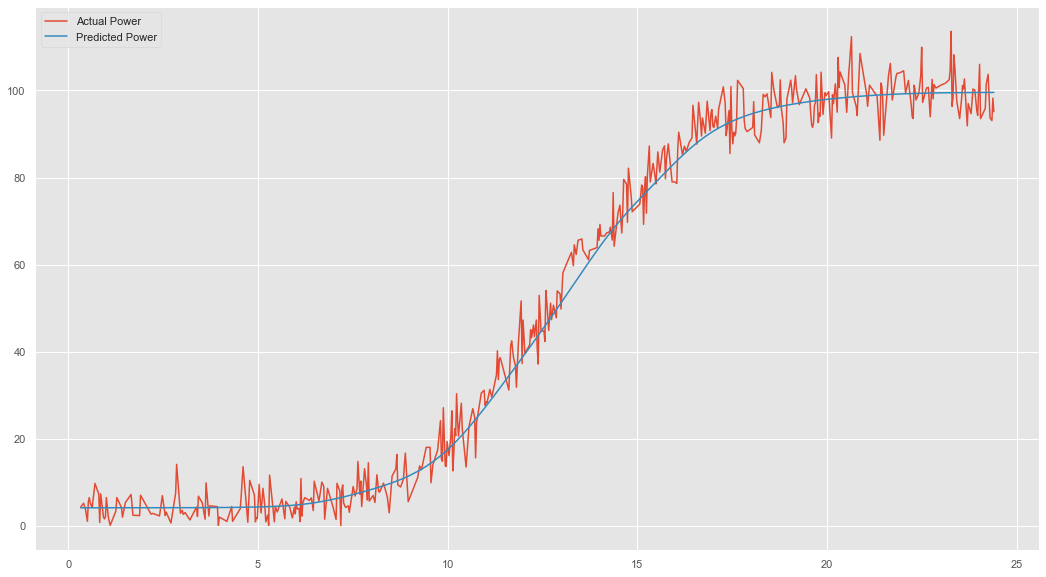

In [40]:
# Plot Data and Predictions to Visualise
plt.plot(x, y, label='Actual Power')
plt.plot(x, model.predict(x), label='Predicted Power')
plt.legend()

In [41]:
# Save the model
model.save("model.h5")
print("model saved")

model saved


#### Conclusion



#### References

1. https://www.esb.ie/tns/education-hub/future-energy/wind-energy

2. https://www.encyclopedia.com/earth-and-environment/ecology-and-environmentalism/environmental-studies/s-shaped-growth-curve#:~:text=S%2Dshaped%20growth%20curve(sigmoid,then%20declines%20in%20a%20negative